In [32]:
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

conn = sqlite3.connect('full_conversation_database.db')
df = pd.read_sql('SELECT * from tweets', conn)
df.head(3)

,id_str,text,lang,created_at,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,"('user', 'id_str')"
0,780682646854787072,@johnnymowlem @VirginAtlantic @IMSA @BAR1Motor...,en,Tue Sep 27 08:17:02 +0000 2016,7.806784e+17,107695463.0,johnnymowlem,224166213
1,780682647429414912,RT @JulieThoin: L'audience reprend. Examen du ...,fr,Tue Sep 27 08:17:02 +0000 2016,NaN,NaN,None,41935535
2,780682655104991232,Flew into Gatwick last night. 5 hour drive nor...,en,Tue Sep 27 08:17:04 +0000 2016,7.806784e+17,165883353.0,gforsterphoto,220691420


In [33]:
len(df[df["('user', 'id_str')"] == "56377143"])

86077

In [34]:
df['weekday'] = [f'{datetime.datetime.strptime(tweet, "%a %b %d %H:%M:%S +0000 %Y").strftime("%a")}' for tweet in df['created_at']]
df['hour'] = [f'{datetime.datetime.strptime(tweet, "%a %b %d %H:%M:%S +0000 %Y").hour}' for tweet in df['created_at']]


In [35]:
df['weekday'] = df['weekday'].astype("category",  categories=['Mon', 'Tue', 
                                                              'Wed', 'Thu', 
                                                              'Fri', 'Sat', 
                                                              'Sun']).cat.codes

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.


In [43]:
df['hour'] = ['0' + str(hour) if int(hour) < 10 else str(hour) for hour in list(df['hour'])]

In [44]:
df['weekday_hour'] = df['weekday'].astype(str) + df['hour'].astype(str)

In [45]:
KLM_outgoing = df[df["('user', 'id_str')"] == "56377143"]
BA_outgoing = df[df["('user', 'id_str')"] == "18332190"]
print(f'Outgoing KLM tweets: {len(KLM_outgoing)}')
print(f'Outgoing BA tweets: {len(BA_outgoing)}')

Outgoing KLM tweets: 86077
Outgoing BA tweets: 150224


In [50]:
KLM_incoming_hours = []
BA_incoming_hours = []
for i, item in tqdm_notebook(df[['text', 'weekday_hour']].iterrows()):
    if '@KLM' in item['text']:
        KLM_incoming_hours.append(item['weekday_hour'])
    elif '@British_Airways' in item['text']:
        BA_incoming_hours.append(item['weekday_hour'])
        
KLM_incoming = pd.Series(KLM_incoming_hours)
BA_incoming = pd.Series(BA_incoming_hours)

#Save data
KLM_incoming.to_csv('KLM_incoming.csv', index=False)
BA_incoming.to_csv('BA_incoming.csv', index=False)

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [48]:
# Read in incoming data
#KLM_incoming = pd.read_csv('KLM_incoming.csv', names=['weekday_hour'])['weekday_hour']
#BA_incoming = pd.read_csv('BA_incoming.csv', names=['weekday_hour'])['weekday_hour']

In [197]:
klm_df= df[df["('user', 'id_str')"] == "56377143"]; klm_df.head()

,id_str,text,lang,created_at,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,"('user', 'id_str')",weekday,hour,weekday_hour
331,780688426832171008,"@pgaanderse Hallo Peter, gaat dit om je vlucht...",nl,Tue Sep 27 08:40:00 +0000 2016,7.806821e+17,197393599.0,pgaanderse,56377143,1,08,108
339,780688489495072768,@pgaanderse &gt;&gt; geselecteerd (heen en ter...,nl,Tue Sep 27 08:40:15 +0000 2016,7.806821e+17,197393599.0,pgaanderse,56377143,1,08,108
342,780688522705530881,"@pgaanderse &gt;&gt; niet lukken, horen we gra...",nl,Tue Sep 27 08:40:22 +0000 2016,7.806821e+17,197393599.0,pgaanderse,56377143,1,08,108
425,780689661014540288,@HemanChong We would like for you to share the...,en,Tue Sep 27 08:44:54 +0000 2016,7.806634e+17,469391870.0,HemanChong,56377143,1,08,108
559,780691473557819392,"@Oscarr1969 Dear Mark, unfortunately you canno...",en,Tue Sep 27 08:52:06 +0000 2016,7.806779e+17,71473002.0,Oscarr1969,56377143,1,08,108


In [310]:
KLM_incoming = [text for text in list(df['text']) if '@KLM' in text]

In [312]:
KLM_incoming

['RT @KLM_UK: What’s the prize for our next #KLM giveaway?\n\nYou decide!\n\nVote for the #WinWithKLM prize you’d like to see in our RT giveaway…',
 'Look 4ward 2our #aero #info training 4 @ZambiaAirports \nwith @KLM @Min_IenM &amp; @KenyaAirways investing in safety… https://t.co/TzpZ5VJg0J',
 'RT @KLM: What an amazing escort for our 2nd medal flight with "our" Paralympic heroes by the Koninklijke Luchtmacht! https://t.co/2XG4m68Xdq',
 '.@KLM @airfrance your websites are totally unusable. Design is broken, useless error messages, not working on firefox... Shame.',
 'Günaydın ☀️ @KLM https://t.co/d0mi8J4rGB',
 'Everything was running smoothly until i have to take a @KLM flight to Amsterdam today',
 'Een toestel nog uit de oude doos @KLM ?? https://t.co/ozhTHBHMnW',
 '@KLM: You gave away our seats that were paid for in May. Now stranded in Schipol airport trying to find seats to get home.',
 'Onlangs zijn er 5 recruiters gestart bij @KLM. Wij wensen deze 5 toppers veel werkplezier toe! :

In [367]:
import re
from nltk.tokenize import word_tokenize

pattern = re.compile('^[A-Z]{2}[0-9]{4}$')
pattern2 = re.compile('^[0-9]{4}[A-Z]{2}$')
pattern3 = re.compile('^[a-z]{2}[0-9]{4}$')
pattern4 = re.compile('^[0-9]{4}[a-z]{2}$')
tweets = []
book_code = []
for t in tqdm_notebook(KLM_incoming):
    for word in word_tokenize(t):
        if pattern.match(word) or pattern2.match(word) or pattern3.match(word) or pattern4.match(word):
            tweets.append(t)
            book_code.append(word)

HBox(children=(IntProgress(value=0, max=227833), HTML(value='')))

In [368]:
tweets

['@KLM Hallo, heb op 18-9 een mail gekregen dat mijn vlucht is gewijzigd (KL1084 op 11 nov 2016). Is daar meer info over? Verder niks gehoord.',
 '@KLM Ik ga 29/9 met vlucht KL0735 naar Curaçao. Lees over een orkaan die langs de ABC-eilanden trekt. Gaat de vlucht toch gewoon door?',
 'Amsterdam-Lyon, @KLM (KL1415): Checked in online.',
 "Hi @DTISoftware:#BugReport in #WorldBusinessClass #KL0855 18Aug'16 @KLM #SourceCode #IFE https://t.co/V8PYJnAfuP",
 'Thanks @KLM for #WorldBusinessClass upgrade #KL0855 #AMS #ICN #UpperDeck-awesome experience,impecable service!My fa… https://t.co/pHDmFT34R5',
 '@KLM ik ben mijn leesbril vergeten mee te nemen uit vliegtuig KL2414, 17 sept 16, departure 18.15 en stoel 7D. Wat te doen?',
 '@KLM Hi! Mijn vlucht (KL0604) is geannuleerd. Is er nog plek voor twee op de KL0602?',
 '@KLM Hi! Mijn vlucht (KL0604) is geannuleerd. Is er nog plek voor twee op de KL0602?',
 "@KLM op de heenvlucht zaten de overhead bins vol dus ik vraag me af of ik nu op m'n terugvlu

In [370]:
len(book_code)

3577

In [371]:
book_code

['KL1084',
 'KL0735',
 'KL1415',
 'KL0855',
 'KL0855',
 'KL2414',
 'KL0604',
 'KL0602',
 'KL1022',
 'KL0702',
 'HV5136',
 'KL1009',
 'KL0592',
 'KL0810',
 'KL1374',
 'KL0604',
 'KL1407',
 'KL1127',
 'KL1366',
 'KL1662',
 'KL1125',
 'KL0791',
 'DL9358',
 'KL1614',
 'DL0163',
 'KL1666',
 'KL0947',
 'KL2424',
 'kl1826',
 'kl6070',
 'KL1185',
 'KL1666',
 'KL1325',
 'KL1327',
 'KL1961',
 'kl1702',
 'MU5111',
 'CZ3248',
 'KL1134',
 'kl1134',
 'KL1160',
 'KL1315',
 'KL1726',
 'KL0612',
 'KL1848',
 'KL1007',
 'KL1024',
 'KL1150',
 'KL1694',
 'KL1703',
 'KL1703',
 'KL1929',
 'kl1765',
 'KL1115',
 'KL1715',
 'KL2641',
 'KL1689',
 'kl1011',
 'KL1159',
 'kl0757',
 'KL1706',
 'kl1689',
 'KL1149',
 'KL1705',
 'KL0919',
 'KL1263',
 'KL3948',
 'KL1009',
 'KL0947',
 'KL1726',
 'KL0601',
 'KL1685',
 'KL1206',
 'KL1008',
 'KL0587',
 'KL1311',
 'KL0904',
 'KL1934',
 'KL1869',
 'KL1876',
 'KL0938',
 'KL1838',
 'KL0605',
 'kl1481',
 'KL1150',
 'KL1685',
 'kl1286',
 'KL1762',
 'KL6009',
 'KL1969',
 'kl0892',

In [372]:
len(set(book_code))

1351

In [245]:
df[df["('user', 'id_str')"] == '76023159']['text'].values

array(['@KLM Kunt u aub zsm contact opnemen? Service ID-nummer: MS003. Mijn vlucht AMs -CDG is net geannuleerd. U bent telefonisch onbereikbaar.',
       '@KLM doordat schiphol dicht was vanavond moest ik een ticket voeken voor morgen 24/2. Nu zienik dat ik een 17:00 clucht heb wat veel',
       '@KLM te laat is. Ik moet dus cancellen maar kom niet door op de platinum call lijn. Mijn boekings code is: 4NECGB. Kunt u helpen?'],
      dtype=object)

In [51]:
KLM_outgoing['weekday_hour'].value_counts().sort_index().divide(KLM_incoming.value_counts().sort_index()).values

array([0.39142857, 0.53814433, 0.22630992, 0.36435644, 0.4187643 ,
       0.54146341, 0.28786537, 0.35      , 0.34065934, 0.38608943,
       0.40735221, 0.46369048, 0.37533802, 0.46002538, 0.27382256,
       0.35059952, 0.42033898, 0.50452489, 0.47679641, 0.35473197,
       0.5003885 , 0.47844828, 0.3367267 , 0.53289474, 0.32985386,
       0.64038462, 0.30345711, 0.24665676, 0.37699115, 0.46329527,
       0.32493249, 0.31095406, 0.36016371, 0.35046729, 0.48645161,
       0.42953397, 0.3784689 , 0.53447099, 0.33700254, 0.2906144 ,
       0.30373832, 0.36431412, 0.53065693, 0.30612245, 0.37777778,
       0.26558408, 0.4558011 , 0.56410256, 0.29590766, 0.61553398,
       0.43865546, 0.26322115, 0.27799228, 0.25853659, 0.39361702,
       0.36299766, 0.27881041, 0.32875075, 0.41234956, 0.47843137,
       0.41686982, 0.47997678, 0.31553215, 0.4487112 , 0.4459607 ,
       0.42682248, 0.41794435, 0.30121704, 0.42027114, 0.30810521,
       0.36769759, 0.45942857, 0.74434389, 0.70893971, 0.42212

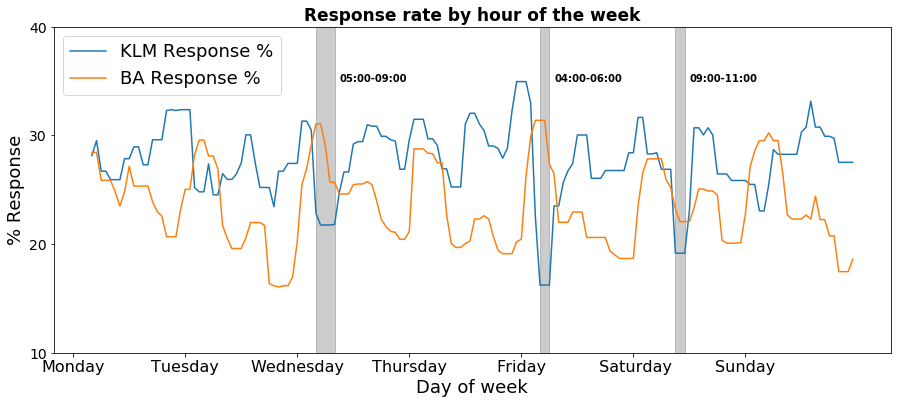

In [193]:
KLM_delta_incoming_outgoing = KLM_outgoing['weekday_hour'].value_counts().sort_index().divide(KLM_incoming.value_counts().sort_index() + KLM_outgoing['weekday_hour'].value_counts().sort_index()).values
BA_delta_incoming_outgoing = BA_outgoing['weekday_hour'].value_counts().sort_index().divide(BA_incoming.value_counts().sort_index() + BA_outgoing['weekday_hour'].value_counts().sort_index()).values
plt.figure(figsize=(15,6))
plt.plot(range(168), pd.Series(KLM_delta_incoming_outgoing*100).rolling(5).median())
plt.plot(range(168), pd.Series(BA_delta_incoming_outgoing*100).rolling(5).median())
plt.title(f'Response rate by hour of the week', fontsize=17, weight='bold')
plt.legend(['KLM Response %', 'BA Response %'], fontsize=18, loc=2)
plt.ylabel('% Response', fontsize=18)
plt.xlabel('Day of week', fontsize=18)
plt.xticks([0,24,48,72,96,120,144], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', ' Saturday', 'Sunday'], fontsize=16)
plt.yticks([10,20,30,40], fontsize=14)
plt.axvspan(100, 102, color='black', alpha=0.2)
plt.axvspan(129, 131, color='black', alpha=0.2)
plt.axvspan(52, 56, color='black', alpha=0.2)
plt.annotate('04:00-06:00', (103,35), weight='bold')
plt.annotate('09:00-11:00', (132,35), weight='bold')
plt.annotate('05:00-09:00', (57,35), weight='bold');
#plt.savefig('response_rate_KLM_BA.png', dpi=1200)


([<matplotlib.axis.XTick at 0x3112b6e48>,
 <a list of 7 Text xticklabel objects>)

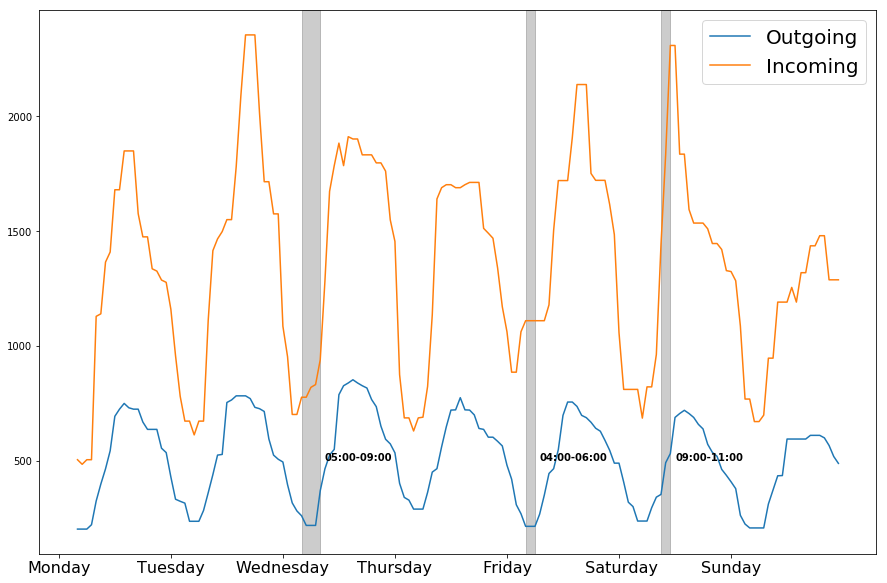

In [196]:
plt.figure(figsize=(15,10))
plt.plot(range(168), pd.Series(KLM_outgoing['weekday_hour'].value_counts().sort_index()).rolling(5).median())
plt.plot(range(168), pd.Series(KLM_incoming.value_counts().sort_index()).rolling(5).median())
plt.legend(['Outgoing', 'Incoming'], fontsize=20)
plt.axvspan(100, 102, color='black', alpha=0.2)
plt.axvspan(129, 131, color='black', alpha=0.2)
plt.axvspan(52, 56, color='black', alpha=0.2)
plt.annotate('04:00-06:00', (103,500), weight='bold')
plt.annotate('09:00-11:00', (132,500), weight='bold')
plt.annotate('05:00-09:00', (57,500), weight='bold');
plt.xticks([0,24,48,72,96,120,144], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', ' Saturday', 'Sunday'], fontsize=16)

Text(57,50,'05:00-09:00')

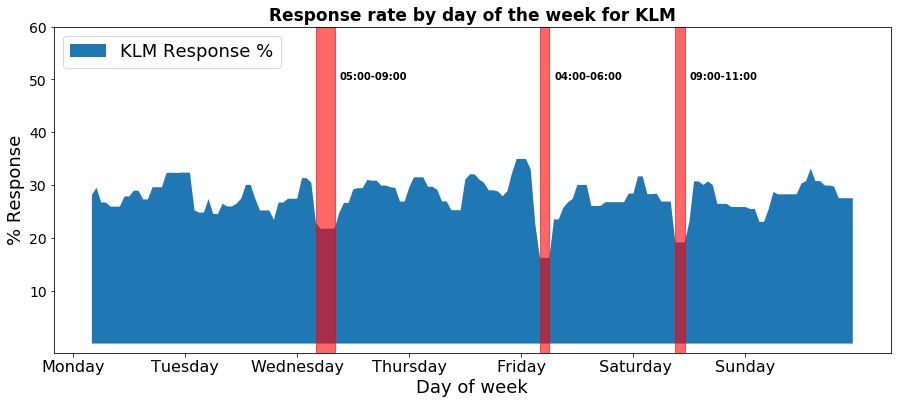

In [188]:
fig, ax = plt.subplots(figsize=(15,6))
         
KLM_delta_incoming_outgoing = KLM_outgoing['weekday_hour'].value_counts().sort_index().divide(KLM_incoming.value_counts().sort_index() + KLM_outgoing['weekday_hour'].value_counts().sort_index()).values
BA_delta_incoming_outgoing = BA_outgoing['weekday_hour'].value_counts().sort_index().divide(BA_incoming.value_counts().sort_index() + BA_outgoing['weekday_hour'].value_counts().sort_index()).values
#plt.figure(figsize=(15,6))
#ax.fill_between(range(168), 0, pd.Series(BA_delta_incoming_outgoing*100).rolling(5).median())
ax.fill_between(range(168), 0, pd.Series(KLM_delta_incoming_outgoing*100).rolling(5).median())
#ax.plot(pd.Series(KLM_delta_incoming_outgoing*100).rolling(5).median())
#ax.plot(pd.Series(BA_delta_incoming_outgoing*100).rolling(5).median())
ax.set_title(f'Response rate by day of the week for KLM', fontsize=17, weight='bold')
ax.legend(['KLM Response %', 'BA Response %'], fontsize=18, loc=2)
ax.set_ylabel('% Response', fontsize=18)
plt.xlabel('Day of week', fontsize=18)
plt.xticks([0,24,48,72,96,120,144], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', ' Saturday', 'Sunday'], fontsize=16)
plt.yticks([10,20,30,40,50,60], fontsize=14)
plt.axvspan(100, 102, color='r', alpha=0.6)
plt.axvspan(129, 131, color='r', alpha=0.6)
plt.axvspan(52, 56, color='r', alpha=0.6)
plt.annotate('04:00-06:00', (103,50), weight='bold')
plt.annotate('09:00-11:00', (132,50), weight='bold')
plt.annotate('05:00-09:00', (57,50), weight='bold')
#plt.savefig('response_rate_KLM.png', dpi=1200)

In [ ]:
#BA_delta_incoming_outgoing = BA_incoming.value_counts().sort_index().subtract(BA_outgoing['weekday_hour'].value_counts().sort_index()).values

#plt.figure(figsize=(15,6))
#plt.plot(range(168), BA_delta_incoming_outgoing)
#plt.plot(range(168), BA_incoming.value_counts().sort_index().values)
#plt.title(f'Tweets by time of day for British Airways / Total = {len(BA_outgoing)+len(BA_incoming)} tweets', fontsize=17, weight='bold')
#plt.legend(['British Airways outgoing', 'British Airways Incoming'], fontsize=18, loc=2)
#plt.ylabel('Amount of tweets', fontsize=18)
#plt.xlabel('Hour of week', fontsize=18)
#plt.xticks(range(24), fontsize=16)
#plt.yticks(fontsize=14);
#plt.savefig('incoming_outgoing_BA.png', dpi=300)

In [133]:
pd.Series(KLM_delta_incoming_outgoing*100).rolling(5).median().nsmallest(10)

100    19.369369
101    19.369369
102    19.369369
129    23.700624
130    23.700624
131    23.700624
53     27.799228
54     27.799228
55     27.799228
56     27.881041
dtype: float64

## Old Code

In [ ]:
'53-56 = Wednesday 05:00-09:00'
'100-102 = Friday 04:00-06:00'
'129-131 = Saturday 09:00-11:00'

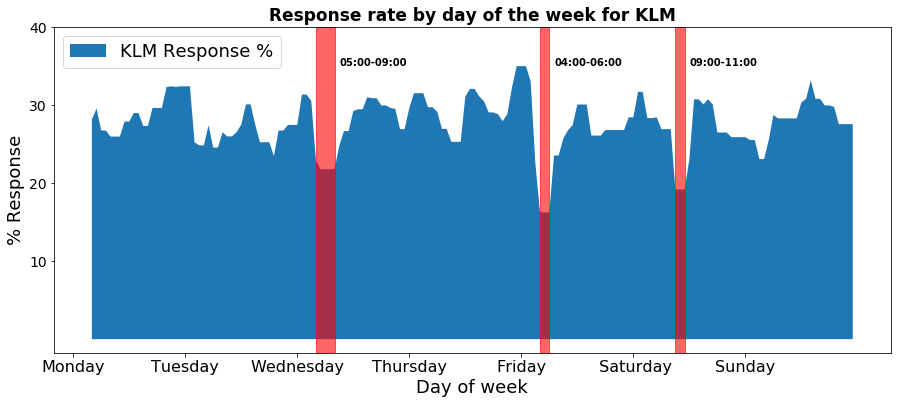

In [191]:
fig, ax = plt.subplots(figsize=(15,6))
         
KLM_delta_incoming_outgoing = KLM_outgoing['weekday_hour'].value_counts().sort_index().divide(KLM_incoming.value_counts().sort_index() + KLM_outgoing['weekday_hour'].value_counts().sort_index()).values
BA_delta_incoming_outgoing = BA_outgoing['weekday_hour'].value_counts().sort_index().divide(BA_incoming.value_counts().sort_index()).values
#plt.figure(figsize=(15,6))
#ax.fill_between(range(168), 0, pd.Series(BA_delta_incoming_outgoing*100).rolling(5).median())
ax.fill_between(range(168), 0, pd.Series(KLM_delta_incoming_outgoing*100).rolling(5).median())
#ax.plot(pd.Series(KLM_delta_incoming_outgoing*100).rolling(5).median())
#ax.plot(pd.Series(BA_delta_incoming_outgoing*100).rolling(5).median())
ax.set_title(f'Response rate by day of the week for KLM', fontsize=17, weight='bold')
ax.legend(['KLM Response %', 'BA Response %'], fontsize=18, loc=2)
ax.set_ylabel('% Response', fontsize=18)
plt.xlabel('Day of week', fontsize=18)
plt.xticks([0,24,48,72,96,120,144], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', ' Saturday', 'Sunday'], fontsize=16)
plt.yticks([10,20,30,40], fontsize=14)
plt.axvspan(100, 102, color='r', alpha=0.6)
plt.axvspan(129, 131, color='r', alpha=0.6)
plt.axvspan(52, 56, color='r', alpha=0.6)
plt.annotate('04:00-06:00', (103,35), weight='bold')
plt.annotate('09:00-11:00', (132,35), weight='bold')
plt.annotate('05:00-09:00', (57,35), weight='bold')
#plt.savefig('response_rate_KLM.png', dpi=1200)


In [ ]:
#KLM_DM_tweets = []
#for i, item in KLM_outgoing[['text', 'id_str']].iterrows():
#    for word in ['privé bericht', 'direct message', 'private message', 'dm']:
#        if word in item['text'].lower():
#            KLM_DM_tweets.append(item['id_str'])
    #if ['privé bericht', 'direct message', 'private message', 'DM']  in item['text'].lower():
        #KLM_DM_tweets.append(item['id_str'])
#        if i % 100000 == 0:
#            print(f'Working on {i}th line')

In [ ]:
#BA_DM_tweets = []
#for i, item in BA_outgoing[['text', 'id_str']].iterrows():
#    for word in ['privé bericht', 'direct message', 'private message', 'dm']:
#        if word in item['text'].lower():
#            BA_DM_tweets.append(item['id_str'])
    #if ['privé bericht', 'direct message', 'private message', 'DM']  in item['text'].lower():
        #KLM_DM_tweets.append(item['id_str'])
#        if i % 100000 == 0:
#            print(f'Working on {i}th line')

In [ ]:
#KLM_incoming_hours = []
#BA_incoming_hours = []
#for i, item in tqdm_notebook(df[['text', 'weekday_hour']].iterrows()):
#    if '@KLM' in item['text']:
#        KLM_incoming_hours.append(item['weekday_hour'])
#    elif '@British_Airways' in item['text']:
#        BA_incoming_hours.append(item['weekday_hour'])
        
#KLM_incoming = pd.Series(KLM_incoming_hours)
#BA_incoming = pd.Series(BA_incoming_hours)

# Save data
#KLM_incoming.to_csv('KLM_incoming.csv', index=False)
#BA_incoming.to_csv('BA_incoming.csv', index=False)